<a href="https://colab.research.google.com/github/Ashraf-Saleheen/Ashraf-Saleheen/blob/main/Auto_Trading_Report_Generate_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 4.6 MB/s eta 0:00:00


🚀 Starting Crypto Trading Report Generation

Loading data...
Please upload your CSV file:


Saving CRYPTO_DUMMY_REPORT.csv to CRYPTO_DUMMY_REPORT (1).csv
Generating analytics...
Creating visualizations...
Saving report...

❌ Error: Source must be a filename (str) or a BytesIO object.


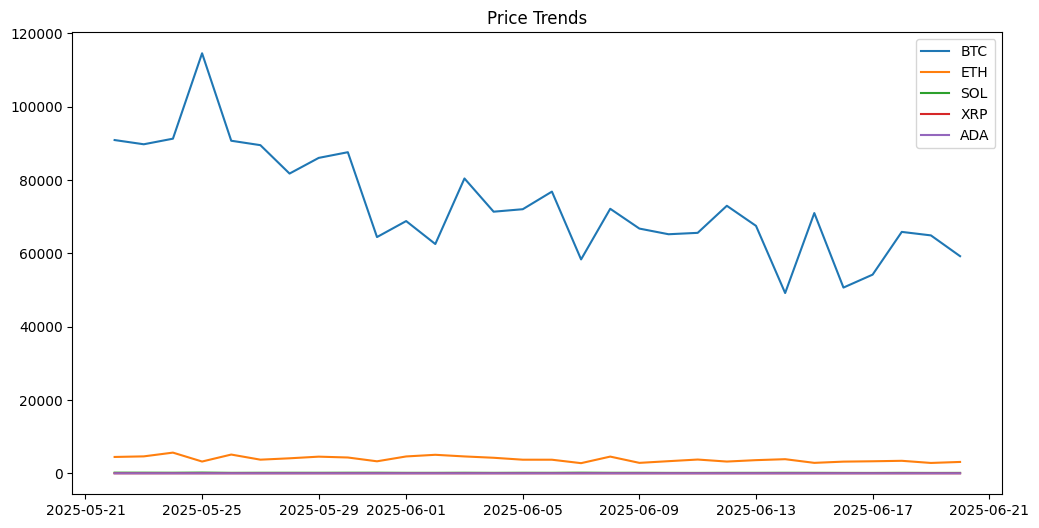

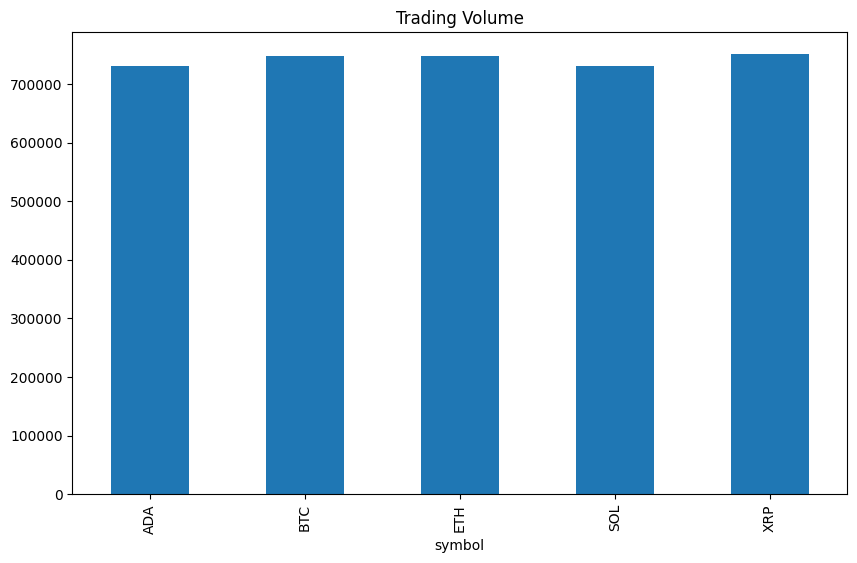

In [5]:
# CRYPTO TRADING REPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import files

# Configuration
INPUT_FILE = "CRYPTO_DUMMY_REPORT.csv"
OUTPUT_FILE = "CRYPTO_TRADING_REPORT.xlsx"

def load_data():
    """Load data with Colab upload"""
    print("Please upload your CSV file:")
    uploaded = files.upload()
    if not uploaded:
        raise FileNotFoundError("No file was uploaded")
    return pd.read_csv(next(iter(uploaded)))

def generate_report():
    print("🚀 Starting Crypto Trading Report Generation")

    try:
        # Load and process data
        print("\nLoading data...")
        df = load_data()
        df['date'] = pd.to_datetime(df['date'])
        df['value_traded'] = df['price'] * df['volume']

        # Generate analytics
        print("Generating analytics...")
        summary = pd.DataFrame({
            'Metric': ['Start Date', 'End Date', 'Cryptocurrencies',
                      'Total Volume', 'Total Value Traded', 'Avg Daily Return'],
            'Value': [
                df['date'].min().strftime('%Y-%m-%d'),
                df['date'].max().strftime('%Y-%m-%d'),
                df['symbol'].nunique(),
                f"{df['volume'].sum():,}",
                f"${df['value_traded'].sum():,.2f}",
                f"{df['returns'].mean():.2%}"
            ]
        })

        crypto_stats = df.groupby('symbol').agg({
            'price': ['mean', 'min', 'max'],
            'volume': 'sum',
            'returns': ['mean', 'std']
        }).round(2)

        # Create visualizations
        print("Creating visualizations...")
        fig1, ax1 = plt.subplots(figsize=(12, 6))
        for symbol in df['symbol'].unique():
            symbol_data = df[df['symbol'] == symbol]
            ax1.plot(symbol_data['date'], symbol_data['price'], label=symbol)
        ax1.set_title('Price Trends')
        ax1.legend()

        fig2, ax2 = plt.subplots(figsize=(10, 6))
        df.groupby('symbol')['volume'].sum().plot(kind='bar', ax=ax2)
        ax2.set_title('Trading Volume')

        # Save report
        print("Saving report...")
        with pd.ExcelWriter(OUTPUT_FILE, engine='xlsxwriter') as writer:
            summary.to_excel(writer, sheet_name='Summary', index=False)
            crypto_stats.to_excel(writer, sheet_name='Crypto Stats')

            workbook = writer.book
            worksheet = workbook.add_worksheet('Charts')
            worksheet.insert_image('B2', '', {'image_data': fig1})
            worksheet.insert_image('B30', '', {'image_data': fig2})

        print(f"\n✅ Report generated: {OUTPUT_FILE}")
        files.download(OUTPUT_FILE)  # Download the file

    except Exception as e:
        print(f"\n❌ Error: {str(e)}")

if __name__ == "__main__":
    generate_report()